In [1]:
import numpy as np

## Arithmetic Operations (allowing for uncertainty)

In [2]:
significant_figures = 4
_float_tolerance = 5 * (10 ** -significant_figures)

def _do_float_division_with_tolerance(divisor, dividend,):
    if _do_float_eq_with_tolerance(divisor, dividend):
        return int(1)
    
    quotient = np.true_divide(divisor, dividend)
    return quotient

def _do_float_subtraction_with_tolerance(minuend, subtrahend,):
    difference = np.subtract(minuend, subtrahend)

    if _do_float_le_with_tolerance(difference + _float_tolerance, int(difference)) and _do_float_ge_with_tolerance(difference - _float_tolerance, int(difference)):
        return int(difference)

    return difference

vectorized_float_division_with_tolerance = np.vectorize(_do_float_division_with_tolerance)
vectorized_float_subtraction_with_tolerance = np.vectorize(_do_float_subtraction_with_tolerance)

def _do_float_eq_with_tolerance(given, to_compare):
    return (round(given, significant_figures) - _float_tolerance) <= to_compare and (round(given, significant_figures) + _float_tolerance) >= to_compare

def _do_float_gt_with_tolerance(given, to_compare):
    return (round(given, significant_figures) - _float_tolerance) > to_compare and (round(given, significant_figures) + _float_tolerance) > to_compare

def _do_float_lt_with_tolerance(given, to_compare):
    return (round(given, significant_figures) - _float_tolerance) < to_compare and (round(given, significant_figures) + _float_tolerance) < to_compare

def _do_float_ge_with_tolerance(given, to_compare):
    return _do_float_gt_with_tolerance(round(given, significant_figures), to_compare) or _do_float_eq_with_tolerance(round(given, significant_figures), to_compare)

def _do_float_le_with_tolerance(given, to_compare):
    return _do_float_lt_with_tolerance(round(given, significant_figures), to_compare) or _do_float_eq_with_tolerance(round(given, significant_figures), to_compare)

vectorized_float_eq_with_tolerance = np.vectorize(_do_float_eq_with_tolerance)
vectorized_float_gt_with_tolerance = np.vectorize(_do_float_gt_with_tolerance)
vectorized_float_lt_with_tolerance = np.vectorize(_do_float_lt_with_tolerance)
vectorized_float_ge_with_tolerance = np.vectorize(_do_float_ge_with_tolerance)
vectorized_float_le_with_tolerance = np.vectorize(_do_float_le_with_tolerance)

# Replace with unit test!
# f1 = 0.0002 + 0.0001
# f2 = 2*0.0001

# print(f'{f1=} > {f2=}', _do_float_gt_with_tolerance(f1, f2))
# print(f'{f1=} < {f2=}', _do_float_lt_with_tolerance(f1, f2))
# print(f'{f1=} = {f2=}', _do_float_eq_with_tolerance(f1, f2))
# print(f'{f1=} >= {f2=}', _do_float_ge_with_tolerance(f1, f2))
# print(f'{f1=} <= {f2=}', _do_float_le_with_tolerance(f1, f2))

## The grid 

### Creation

In [3]:
M = 1

In [4]:
def get_curvature_factor(r_coordinate):

    if r_coordinate == 0:
        return np.inf

    schwarzschild_radius = 2*M
    r_coordinate_scaled_by_M = np.multiply(r_coordinate, M)

    quotient = vectorized_float_division_with_tolerance(divisor=schwarzschild_radius, dividend=r_coordinate_scaled_by_M)
    difference = vectorized_float_subtraction_with_tolerance(minuend=np.ones(np.shape(r_coordinate)), subtrahend=quotient)

    if difference > 0:
        return np.sqrt(difference)
    else:
        return -np.sqrt(np.abs(difference))

from dataclasses import dataclass
from collections import OrderedDict

@dataclass(frozen=True)
class Dimensions:
    left: int
    right: int
    top: int
    bottom: int
    resolution: float

@dataclass(frozen=True)
class Cartesian:
    x: int
    y: int

    def __eq__(self, other):
        if isinstance(other, type(self)):
            x_match = vectorized_float_eq_with_tolerance(self.x, other.x)
            y_match = vectorized_float_eq_with_tolerance(self.y, other.y)
            return x_match and y_match
        else:
            return NotImplemented

    def __ge__(self, other):
        if isinstance(other, type(self)):
            x_match = vectorized_float_ge_with_tolerance(self.x, other.x)
            y_match = vectorized_float_ge_with_tolerance(self.y, other.y)
            return x_match and y_match
        else:
            return NotImplemented

    def __le__(self, other):
        if isinstance(other, type(self)):
            x_match = vectorized_float_le_with_tolerance(self.x, other.x)
            y_match = vectorized_float_le_with_tolerance(self.y, other.y)
            return x_match and y_match
        else:
            return NotImplemented

    ## TODO: need to consider case where x == x, y > y
    def __gt__(self, other):
        if isinstance(other, type(self)):
            x_match = vectorized_float_gt_with_tolerance(self.x, other.x)
            y_match = vectorized_float_gt_with_tolerance(self.y, other.y)
            return x_match and y_match
        else:
            return NotImplemented

    def __lt__(self, other):
        if isinstance(other, type(self)):
            x_match = vectorized_float_lt_with_tolerance(self.x, other.x)
            y_match = vectorized_float_lt_with_tolerance(self.y, other.y)
            return x_match and y_match
        else:
            return NotImplemented

@dataclass(frozen=True)
class Polar:
    r: int
    phi: float

    def __eq__(self, other):
        if isinstance(other, type(self)):
            r_match = vectorized_float_eq_with_tolerance(self.r, other.r)
            phi_match = vectorized_float_eq_with_tolerance(self.phi, other.phi)
            return r_match and phi_match
        else:
            return NotImplemented

    def __ge__(self, other):
        if isinstance(other, type(self)):
            r_match = vectorized_float_ge_with_tolerance(self.r, other.r)
            phi_match = vectorized_float_ge_with_tolerance(self.phi, other.phi)
            return r_match and phi_match
        else:
            return NotImplemented

    def __le__(self, other):
        if isinstance(other, type(self)):
            r_match = vectorized_float_le_with_tolerance(self.r, other.r)
            phi_match = vectorized_float_le_with_tolerance(self.phi, other.phi)
            return r_match and phi_match
        else:
            return NotImplemented

    def __gt__(self, other):
        if isinstance(other, type(self)):
            if vectorized_float_eq_with_tolerance(self.r, other.r):
                return vectorized_float_gt_with_tolerance(self.phi, other.phi)

            r_match = vectorized_float_gt_with_tolerance(self.r, other.r)
            phi_match = vectorized_float_gt_with_tolerance(self.phi, other.phi)

            return r_match and phi_match
        else:
            return NotImplemented

    def __lt__(self, other):
        if isinstance(other, type(self)):
            if vectorized_float_eq_with_tolerance(self.r, other.r):
                return vectorized_float_lt_with_tolerance(self.phi, other.phi) 

            r_match = vectorized_float_lt_with_tolerance(self.r, other.r)
            phi_match = vectorized_float_lt_with_tolerance(self.phi, other.phi)
            return r_match and phi_match
        else:
            return NotImplemented

class Coordinate:
    def __init__(self, q1: int, q2: int, is_cartesian=True,):
        if is_cartesian:
            self.cartesian = Cartesian(q1, q2)
            self.polar = Coordinate.convert_from_cartesian(self.cartesian)
        else:
            self.polar = Polar(q1, q2)
            self.cartesian = Coordinate.convert_from_polar(self.polar)
        self.curvature = get_curvature_factor(self.polar.r)
    
    def convert_from_polar(coordinates_to_convert: Polar):
        x_coordinate = np.multiply(coordinates_to_convert.r, np.cos(coordinates_to_convert.phi))
        y_coordinate = np.multiply(coordinates_to_convert.r, np.sin(coordinates_to_convert.phi))

        return Cartesian(x=x_coordinate, y=y_coordinate)

    def convert_from_cartesian(coordinates_to_convert: Cartesian):
        r_coordinate = np.sqrt(np.power(coordinates_to_convert.x , 2) + np.power(coordinates_to_convert.y , 2))

        if r_coordinate == 0:
            return Polar(r=r_coordinate, phi=0)
        
        phi_coordinate = np.arctan2(coordinates_to_convert.y, coordinates_to_convert.x)

        if _do_float_lt_with_tolerance(phi_coordinate, 0):
            phi_coordinate = _do_float_subtraction_with_tolerance(phi_coordinate, -2*np.pi)

        return Polar(r=r_coordinate, phi=phi_coordinate)
    
    def __eq__(self, other):
        if isinstance(other, type(self)):
            return self.cartesian == other.cartesian and self.polar == other.polar
        else:
            return NotImplemented

    def __gt__(self, other):
        if isinstance(other, type(self)):
            return self.cartesian > other.cartesian and self.polar > other.polar
        else:
            return NotImplemented

    def __ge__(self, other):
        if isinstance(other, type(self)):
           return self.cartesian >= other.cartesian and self.polar >= other.polar
        else:
            return NotImplemented

    def __lt__(self, other):
        if isinstance(other, type(self)):
            return self.cartesian < other.cartesian and self.polar < other.polar
        else:
            return NotImplemented

    def __le__(self, other):
        if isinstance(other, type(self)):
           return self.cartesian <= other.cartesian and self.polar <= other.polar
        else:
            return NotImplemented

class Latticework:

    def __init__(self, dimensions: Dimensions):
        self.dimensions = dimensions
        self._build_grid()
        self._build_dictionary_of_shells()
    
    def _build_grid(self):
        self.vertices = { }
        for x in np.arange(start=self.dimensions.left, stop=self.dimensions.right + 1, step= self.dimensions.resolution):
            for y in np.arange(start=self.dimensions.bottom, stop=self.dimensions.top + 1, step= self.dimensions.resolution):
                self.vertices.update({(x, y) : Coordinate(q1=x, q2=y)})
    
    def get_coordinates_of_constant_r(self, constant_r, ascending=True, complete_loop=True) -> list():
        shell_of_constant_r = self.shells["r"][constant_r].copy()
        if not ascending:
            shell_of_constant_r.sort(reverse= not ascending, key=lambda x: x.polar.phi)
        if complete_loop:
            shell_of_constant_r.append(shell_of_constant_r[0])
        return shell_of_constant_r
    
    def get_coordinates_of_constant_phi(self, constant_phi, ascending=True) -> list():
        shell_of_constant_phi = self.shells["phi"][constant_phi].copy()
        if not ascending:
            shell_of_constant_phi.sort(reverse= not ascending, key=lambda x: x.polar.r)
        return shell_of_constant_phi

    def _build_dictionary_of_shells(self):
        self.shells = { 
            "r" : { }, 
            "phi" : { }, 
            }

        for vertex, coordinate in self.vertices.items():
            if coordinate.polar.r not in self.shells["r"].keys():
                self.shells["r"].update({coordinate.polar.r : [ coordinate, ]})
            else:
                self.shells["r"][coordinate.polar.r].append(coordinate)
            
            phi_exists = False
            for phi in self.shells["phi"].keys():
                if _do_float_eq_with_tolerance(coordinate.polar.phi, phi):
                    phi_exists = True
                    self.shells["phi"][coordinate.polar.phi].append(coordinate)
                    break
            if phi_exists == False:
                self.shells["phi"].update({coordinate.polar.phi : [ coordinate, ]})

        for r in self.shells["r"].keys():
            self.shells["r"][r].sort(key=lambda x: x.polar.phi)
        
        for phi in self.shells["phi"].keys():
            self.shells["phi"][phi].sort(key=lambda x: x.polar.r)

        

### Visualization

In [35]:
import matplotlib.pyplot as plt

def draw_layout(lattice, figure_size = (16,16)):

    fig = plt.figure(figsize=figure_size, dpi=100,)
    ax = fig.add_subplot()
    
    rings = [ ]
    for r in lattice.shells["r"].keys():
        coordinates_with_r = lattice.get_coordinates_of_constant_r(r)

        xs = [ ]
        ys = [ ]

        for coordinate in coordinates_with_r:
            xs.append(coordinate.cartesian.x)
            ys.append(coordinate.cartesian.y)
        rings.append((np.asarray(xs), np.asarray(ys)))

    for ring in rings:
        ax.plot(ring[0], ring[1], c='C1')

    for vertices, coordinate in lattice.vertices.items():
        ax.scatter(coordinate.cartesian.x, coordinate.cartesian.y, c='C0')

    ax.set_xlim( (lattice.dimensions.left, lattice.dimensions.right) )
    ax.set_xticks([x for x in range(lattice.dimensions.left, lattice.dimensions.right + 1)])
    ax.set_xticklabels( [f'{int(x)}' for x in range(lattice.dimensions.left, lattice.dimensions.right + 1)])

    ax.set_ylim( (lattice.dimensions.bottom, lattice.dimensions.top) )
    ax.set_yticks([y for y in range(lattice.dimensions.bottom, lattice.dimensions.top + 1)])
    ax.set_yticklabels( [f'{int(y)}' for y in range(lattice.dimensions.bottom, lattice.dimensions.top + 1)])

    return fig, ax

def draw_layout_3D(lattice, figure_size = (16,16)):

    fig = plt.figure(figsize=figure_size, dpi=100,)
    ax = fig.add_subplot(projection='3d')
    
    rings = [ ]
    for r in lattice.shells["r"].keys():
        coordinates_with_r = lattice.get_coordinates_of_constant_r(r)

        xs = [ ]
        ys = [ ]
        zs = [ ]
        for coordinate in coordinates_with_r:
            xs.append(coordinate.cartesian.x)
            ys.append(coordinate.cartesian.y)
            if (coordinate.polar.r <= 2.0):
                zs.append(0)
            else:
                zs.append(np.true_divide(1, coordinate.curvature))
            # if (coordinate.polar.r > 2):
            #     zs.append(np.true_divide(1, coordinate.curvature))
            # else:
            #     zs.append(0)
        rings.append((np.asarray(xs), np.asarray(ys), np.asarray(zs)))

    for ring in rings:
        if (ring[2].any() == 0):
            ax.plot(ring[0], ring[1], 4, c='C3')
        else:
            ax.plot(ring[0], ring[1], ring[2], c='C1')

    # curves = [ ]
    # for phi in lattice.shells["phi"].keys():
    #     coordinates_with_phi = lattice.get_coordinates_of_constant_phi(phi)
        
    #     xs = [ ]
    #     ys = [ ]
    #     zs = [ ]
    #     for coordinate in coordinates_with_phi:
    #         xs.append(coordinate.cartesian.x)
    #         ys.append(coordinate.cartesian.y)
    #         if (coordinate.polar.r > 2.0):
    #             zs.append(np.true_divide(1, coordinate.curvature))
    #         else:
    #             zs.append(4)
    #     curves.append((np.asarray(xs), np.asarray(ys), np.asarray(zs)))

    # for curve in curves:
    #     ax.plot(curve[0], curve[1], curve[2], c='C2')

    for vertices, coordinate in lattice.vertices.items():
        if coordinate.polar.r <= 2.0:
            ax.scatter(coordinate.cartesian.x, coordinate.cartesian.y, 4, c='C3')
        else:
            ax.scatter(coordinate.cartesian.x, coordinate.cartesian.y, np.true_divide(1, coordinate.curvature), c='C0')
            

    ax.set_xlim( (lattice.dimensions.left, lattice.dimensions.right) )
    ax.set_xticks([x for x in range(lattice.dimensions.left, lattice.dimensions.right + 1)])
    ax.set_xticklabels( [f'{int(x)}' for x in range(lattice.dimensions.left, lattice.dimensions.right + 1)])

    ax.set_ylim( (lattice.dimensions.bottom, lattice.dimensions.top) )
    ax.set_yticks([y for y in range(lattice.dimensions.bottom, lattice.dimensions.top + 1)])
    ax.set_yticklabels( [f'{int(y)}' for y in range(lattice.dimensions.bottom, lattice.dimensions.top + 1)])

    ax.set_zlim( bottom=1, top=4.1,)

    return fig, ax

In [29]:
empty_lattice = Latticework(dimensions=Dimensions(left=-5, right=5, top=5, bottom=-5, resolution=1))

maximum_curvature = 0
smallest_r_outside_horizon = 3
coord_of_r = None
for r in empty_lattice.shells["r"].keys():
    if r < smallest_r_outside_horizon and r > 2.0:
        smallest_r_outside_horizon = r
        coord_of_r = empty_lattice.shells["r"][smallest_r_outside_horizon][0]
print(np.true_divide(1, empty_lattice.vertices[(coord_of_r.cartesian.x, coord_of_r.cartesian.y)].curvature))

3.077683537175253


#### 2D View

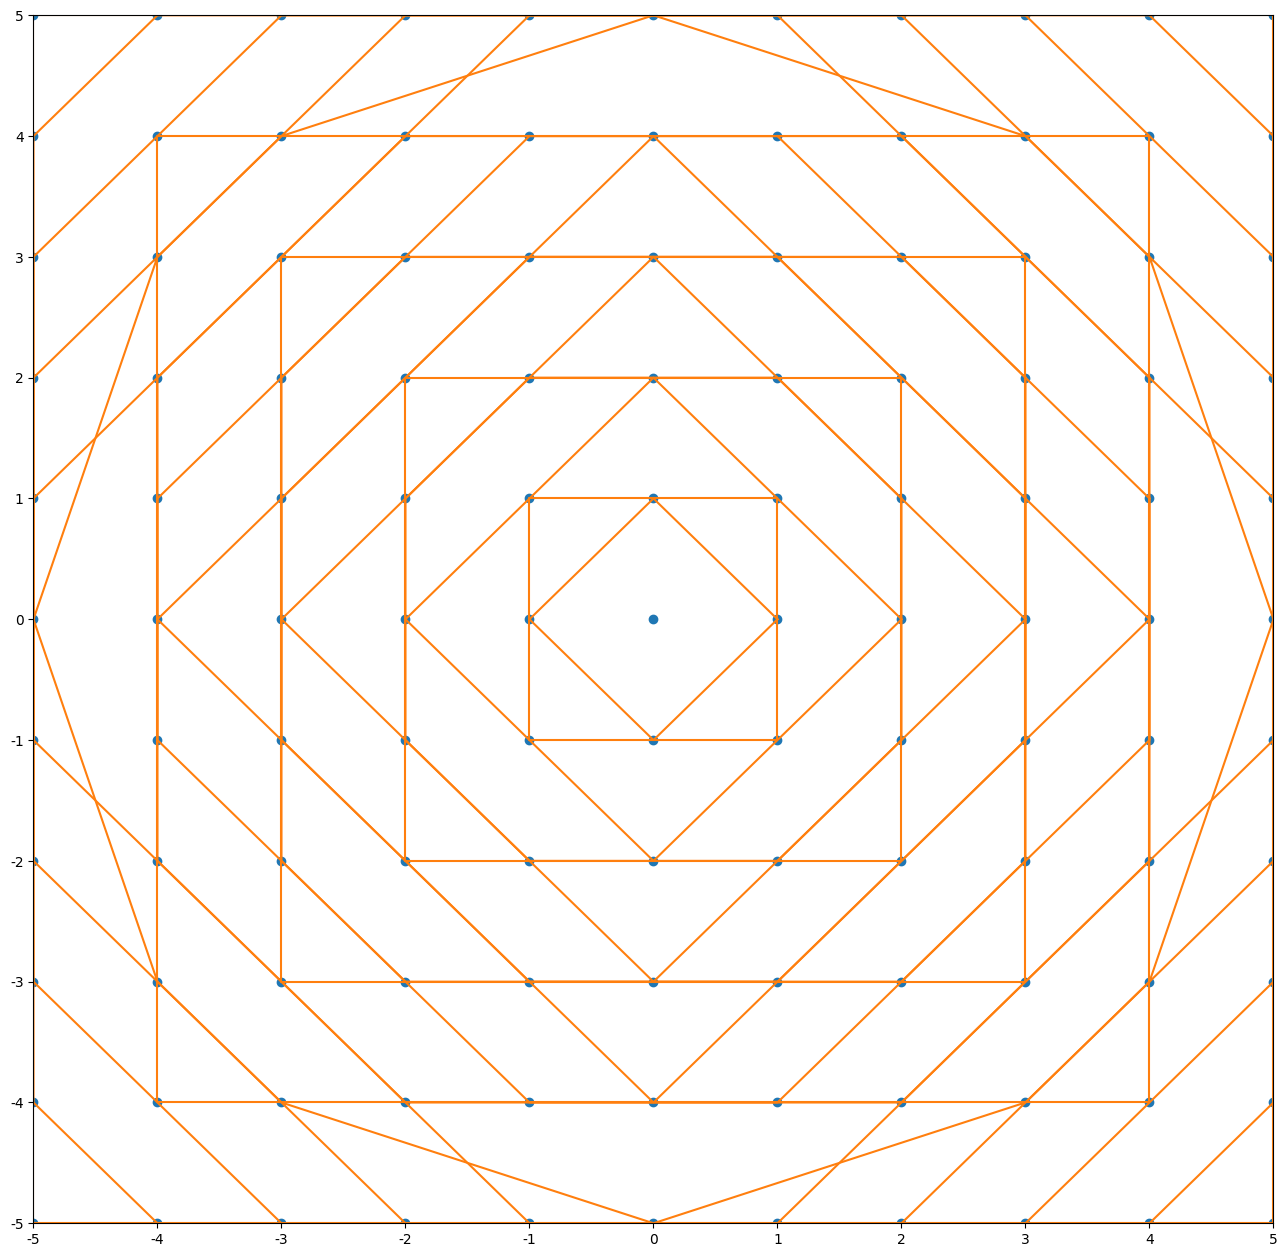

In [18]:
#Flat
fig, ax = draw_layout(empty_lattice)
plt.savefig(f'empty_lattice.jpg',bbox_inches='tight')

#### 3D View

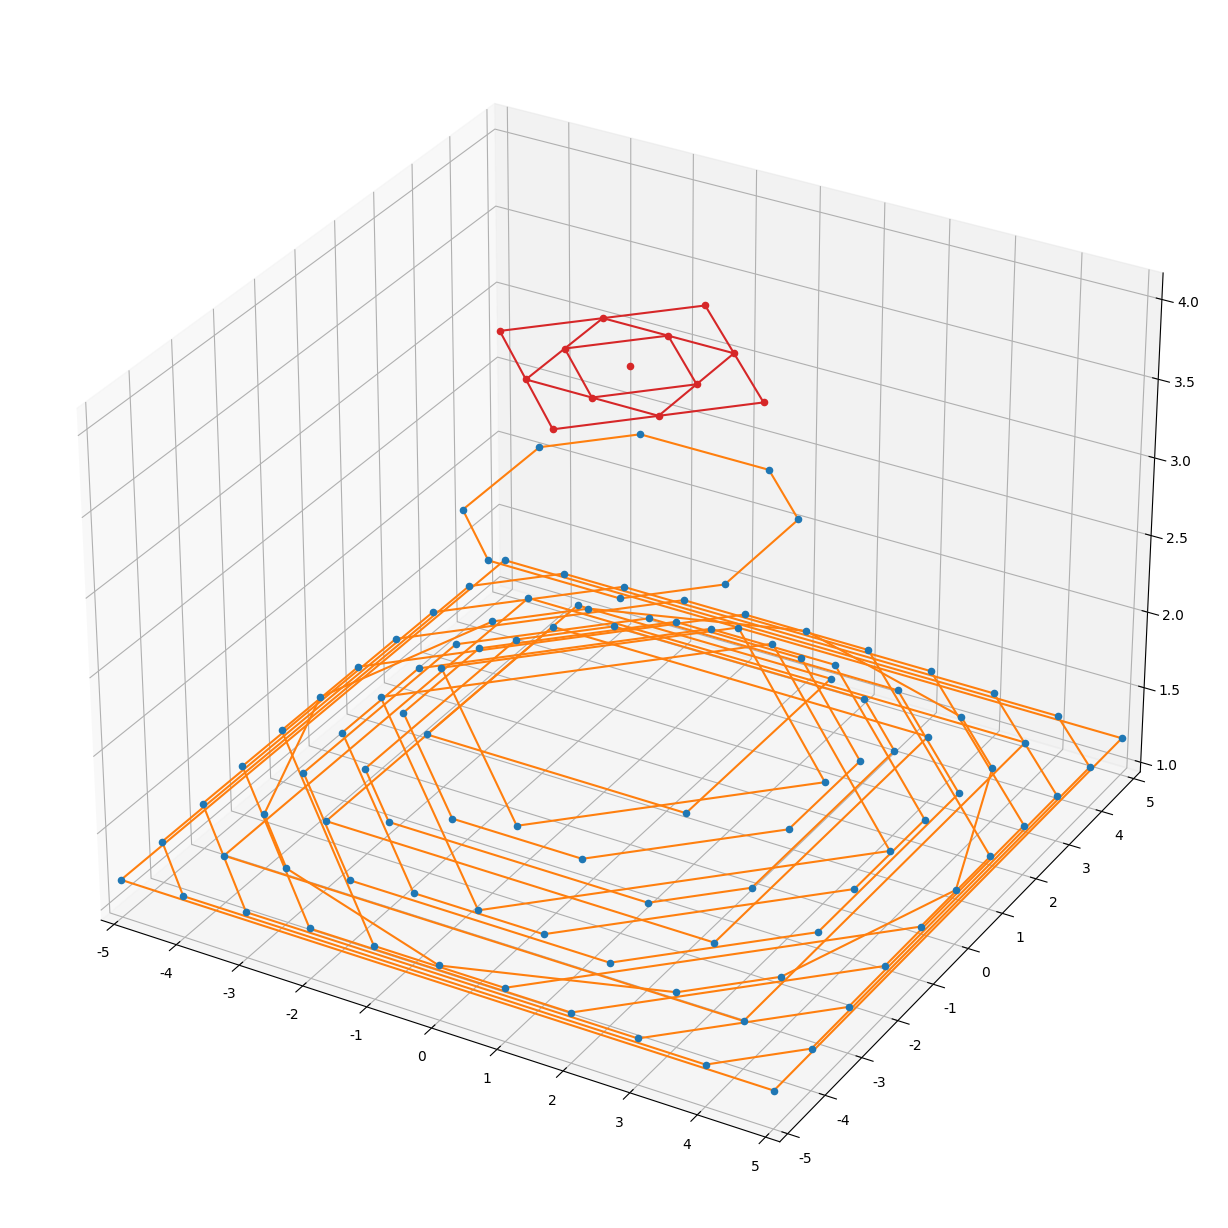

In [36]:
#3D
fig, ax = draw_layout_3D(empty_lattice)

plt.savefig(f'empty_lattice_with_curvature.jpg',bbox_inches='tight')

#### Rotating 3D View

In [37]:
import matplotlib.animation as animation

fig, ax = draw_layout_3D(empty_lattice)

def get_next_angle(frame):
    current_angle = frame
    ax.view_init(30, current_angle)

next_angle = get_next_angle

anim = animation.FuncAnimation(fig, next_angle, frames=180)

writer = animation.PillowWriter(fps=30)
from pathlib import Path
file = Path().absolute()

anim.save(f'{file}\\rotating_embedded_lattice.gif', writer=writer)

# Orbits and Geodesics with angular displacement

## General Python Overhead

### Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

### Constants

In [ ]:
c = 1
M = 1000
G = 1

dr_BK = 1
dt_BK = 1

rcoord = np.arange(3,10)
tcoord = np.arange(3,10)
phicoord = np.linspace(0, 2*np.pi, np.shape(rcoord)[0]*4)

_pi_half = np.true_divide(np.pi, 2)
figure_size = (16,16)

dr_shell_res = 0.1
# r_start, r_stop = 3, 10
# rcoord = np.linspace(r_start, r_stop,num=int((r_stop-r_start)/dr_shell_res))

### Plot Info

In [ ]:
general_plot_font = FontProperties()
general_plot_font.set_family('serif')
general_plot_font.set_name('Times New Roman')
general_plot_font.set_size(30)

axes_plot_font = FontProperties()
axes_plot_font.set_family('serif')
axes_plot_font.set_name('Times New Roman')
axes_plot_font.set_size(48)

math_plot_font = FontProperties()
math_plot_font.set_family('serif')
math_plot_font.set_name('Times New Roman')
math_plot_font.set_size(40)

plot_info = {
    "font" : {
        "general" : general_plot_font,
        "axes" : axes_plot_font,
        "math" : math_plot_font,
    },
}

## Angular Geodesic

#### Schwarzschild General:

In [ ]:
def get_curvature_factor(r_coordinate):
    return np.sqrt(np.subtract(1, np.true_divide(2*M, np.multiply(r_coordinate, M))))

def get_effective_potential_per_unit_mass(r_coordinate, angular_momentum_per_mass):
    return np.multiply(get_curvature_factor(r_coordinate), np.sqrt(np.add(np.ones(np.shape(r_coordinate)[0]), np.power(np.true_divide(angular_momentum_per_mass, r_coordinate), 2))))

def get_energy_per_unit_mass(r_coordinate, dt, dtau):
    return np.multiply(get_curvature_factor(r_coordinate), np.true_divide(dt, dtau))

#### Satellite

In [ ]:
def satellite_dr_dot_squared(r_coordinate, energy_per_mass, angular_momentum_per_mass, dtau):
    return np.subtract(np.power(get_energy_per_unit_mass(r_coordinate, dt, dtau), 2), np.power(get_effective_potential_per_unit_mass(r_coordinate, angular_momentum_per_mass), 2))

def get_dV_dr(r_coordinate, angular_momentum_per_mass):
    return np.multiply(-np.ones(np.shape(r_coordinate)), np.true_divide(np.add(np.multiply(M, np.power(r_coordinate, 2)), np.subtract(np.multiply(3*M, np.power(angular_momentum_per_mass, 2), np.multiply(np.power(angular_momentum_per_mass, 2), r_coordinate)))) , np.power(r_coordinate, 4)))

This comes from the law of conservation of energy (Equation 3 from EBH). By solving $E/m=\left(1-\frac{2M}{r}\right) \frac{dt}{d\tau}$ for the satellite's wristwatch clock, $dt$, we obtain a function of proper time that describes the satellite's clock.

In [ ]:
def get_satellite_dt(r_coordinate, energy_per_mass, dtau):
    return np.multiply(np.true_divide(energy_per_mass, np.power(get_curvature_factor(r_coordinate=r_coordinate), 2)), dtau)

Then, using the law of conservation of angular momentum (Equation 19, EBH), we find the change in $\phi$ coordinate for the satellite as a function of proper time.
$$\frac{d\phi}{d\tau} = \frac{\frac{L}{m}}{r^2}$$

In [ ]:
def get_satellite_dphi(r_coordinate, angular_momentum_per_mass, dtau):
    return np.multiply(np.true_divide(angular_momentum_per_mass, np.power(r_coordinate, 2)), dtau)

In [ ]:
def get_satellite_dr(r_coordinate, energy_per_mass, angular_momentum_per_mass, dtau):
    r_coord = np.abs(r_coordinate)
    _angular_component = np.multiply(get_curvature_factor(r_coordinate=r_coord), np.power(np.true_divide(angular_momentum_per_mass, r_coord), 2))
    difference_of_energy_and_angular = np.subtract(np.power(energy_per_mass, 2), _angular_component)
    direction = 1 if difference_of_energy_and_angular > 0 else -1
    return np.multiply(np.sqrt(np.absolute(difference_of_energy_and_angular)), dtau * direction)

### Shell Measurements

In [ ]:
def dr_shell(r_coordinate):
    return np.true_divide(dr_BK, np.sqrt(np.subtract(1, np.true_divide(2*M, np.multiply(r_coordinate, M)))))

def dt_shell(r_coordinate):
    return np.multiply(dt_BK, np.sqrt(np.subtract(1, np.true_divide(2*M, np.multiply(r_coordinate, M)))))

### Plotting Functions

In [ ]:
def create_orbital_figure(ax, satellite_phi, r_coordinates, plot_info, ):
    ax.set_title(plot_info['title'], fontproperties=plot_info['font']['axes'],)

    ax.set_xlabel(plot_info['x_axis']['label'], fontproperties=plot_info['font']['axes'], labelpad=20, loc='right')
    ax.set_xlim(plot_info['x_axis']['lim'])
    ax.set_xticks(plot_info['x_axis']['ticks'])
    ax.set_xticklabels(plot_info['x_axis']['tick_labels'], fontproperties=plot_info['font']['axes'],)

    ax.set_ylabel(plot_info['y_axis']['label'], fontproperties=plot_info['font']['axes'], labelpad=20)
    ax.set_ylim(plot_info['y_axis']['lim'])
    ax.set_yticks(plot_info['y_axis']['ticks'])
    ax.set_yticklabels(plot_info['y_axis']['tick_labels'], fontproperties=plot_info['font']['axes'],)

    ax.plot(satellite_phi, r_coordinates)
    return ax

In [ ]:
def create_orbital_figure_2(ax, satellite_phi, r_coordinates, plot_info, ):
    # ax.set_title(plot_info['title'], fontproperties=plot_info['font']['axes'],)

    # ax.set_xlabel(plot_info['x_axis']['label'], fontproperties=plot_info['font']['axes'], labelpad=20, loc='right')
    # ax.set_xlim(plot_info['x_axis']['lim'])
    # ax.set_xticks(plot_info['x_axis']['ticks'])
    # ax.set_xticklabels(plot_info['x_axis']['tick_labels'], fontproperties=plot_info['font']['axes'],)

    # ax.set_ylabel(plot_info['y_axis']['label'], fontproperties=plot_info['font']['axes'], labelpad=20)
    # ax.set_ylim(plot_info['y_axis']['lim'])
    # ax.set_yticks(plot_info['y_axis']['ticks'])
    # ax.set_yticklabels(plot_info['y_axis']['tick_labels'], fontproperties=plot_info['font']['axes'],)

    ax.plot(satellite_phi, r_coordinates)
    return ax

# Orbits

## Circular

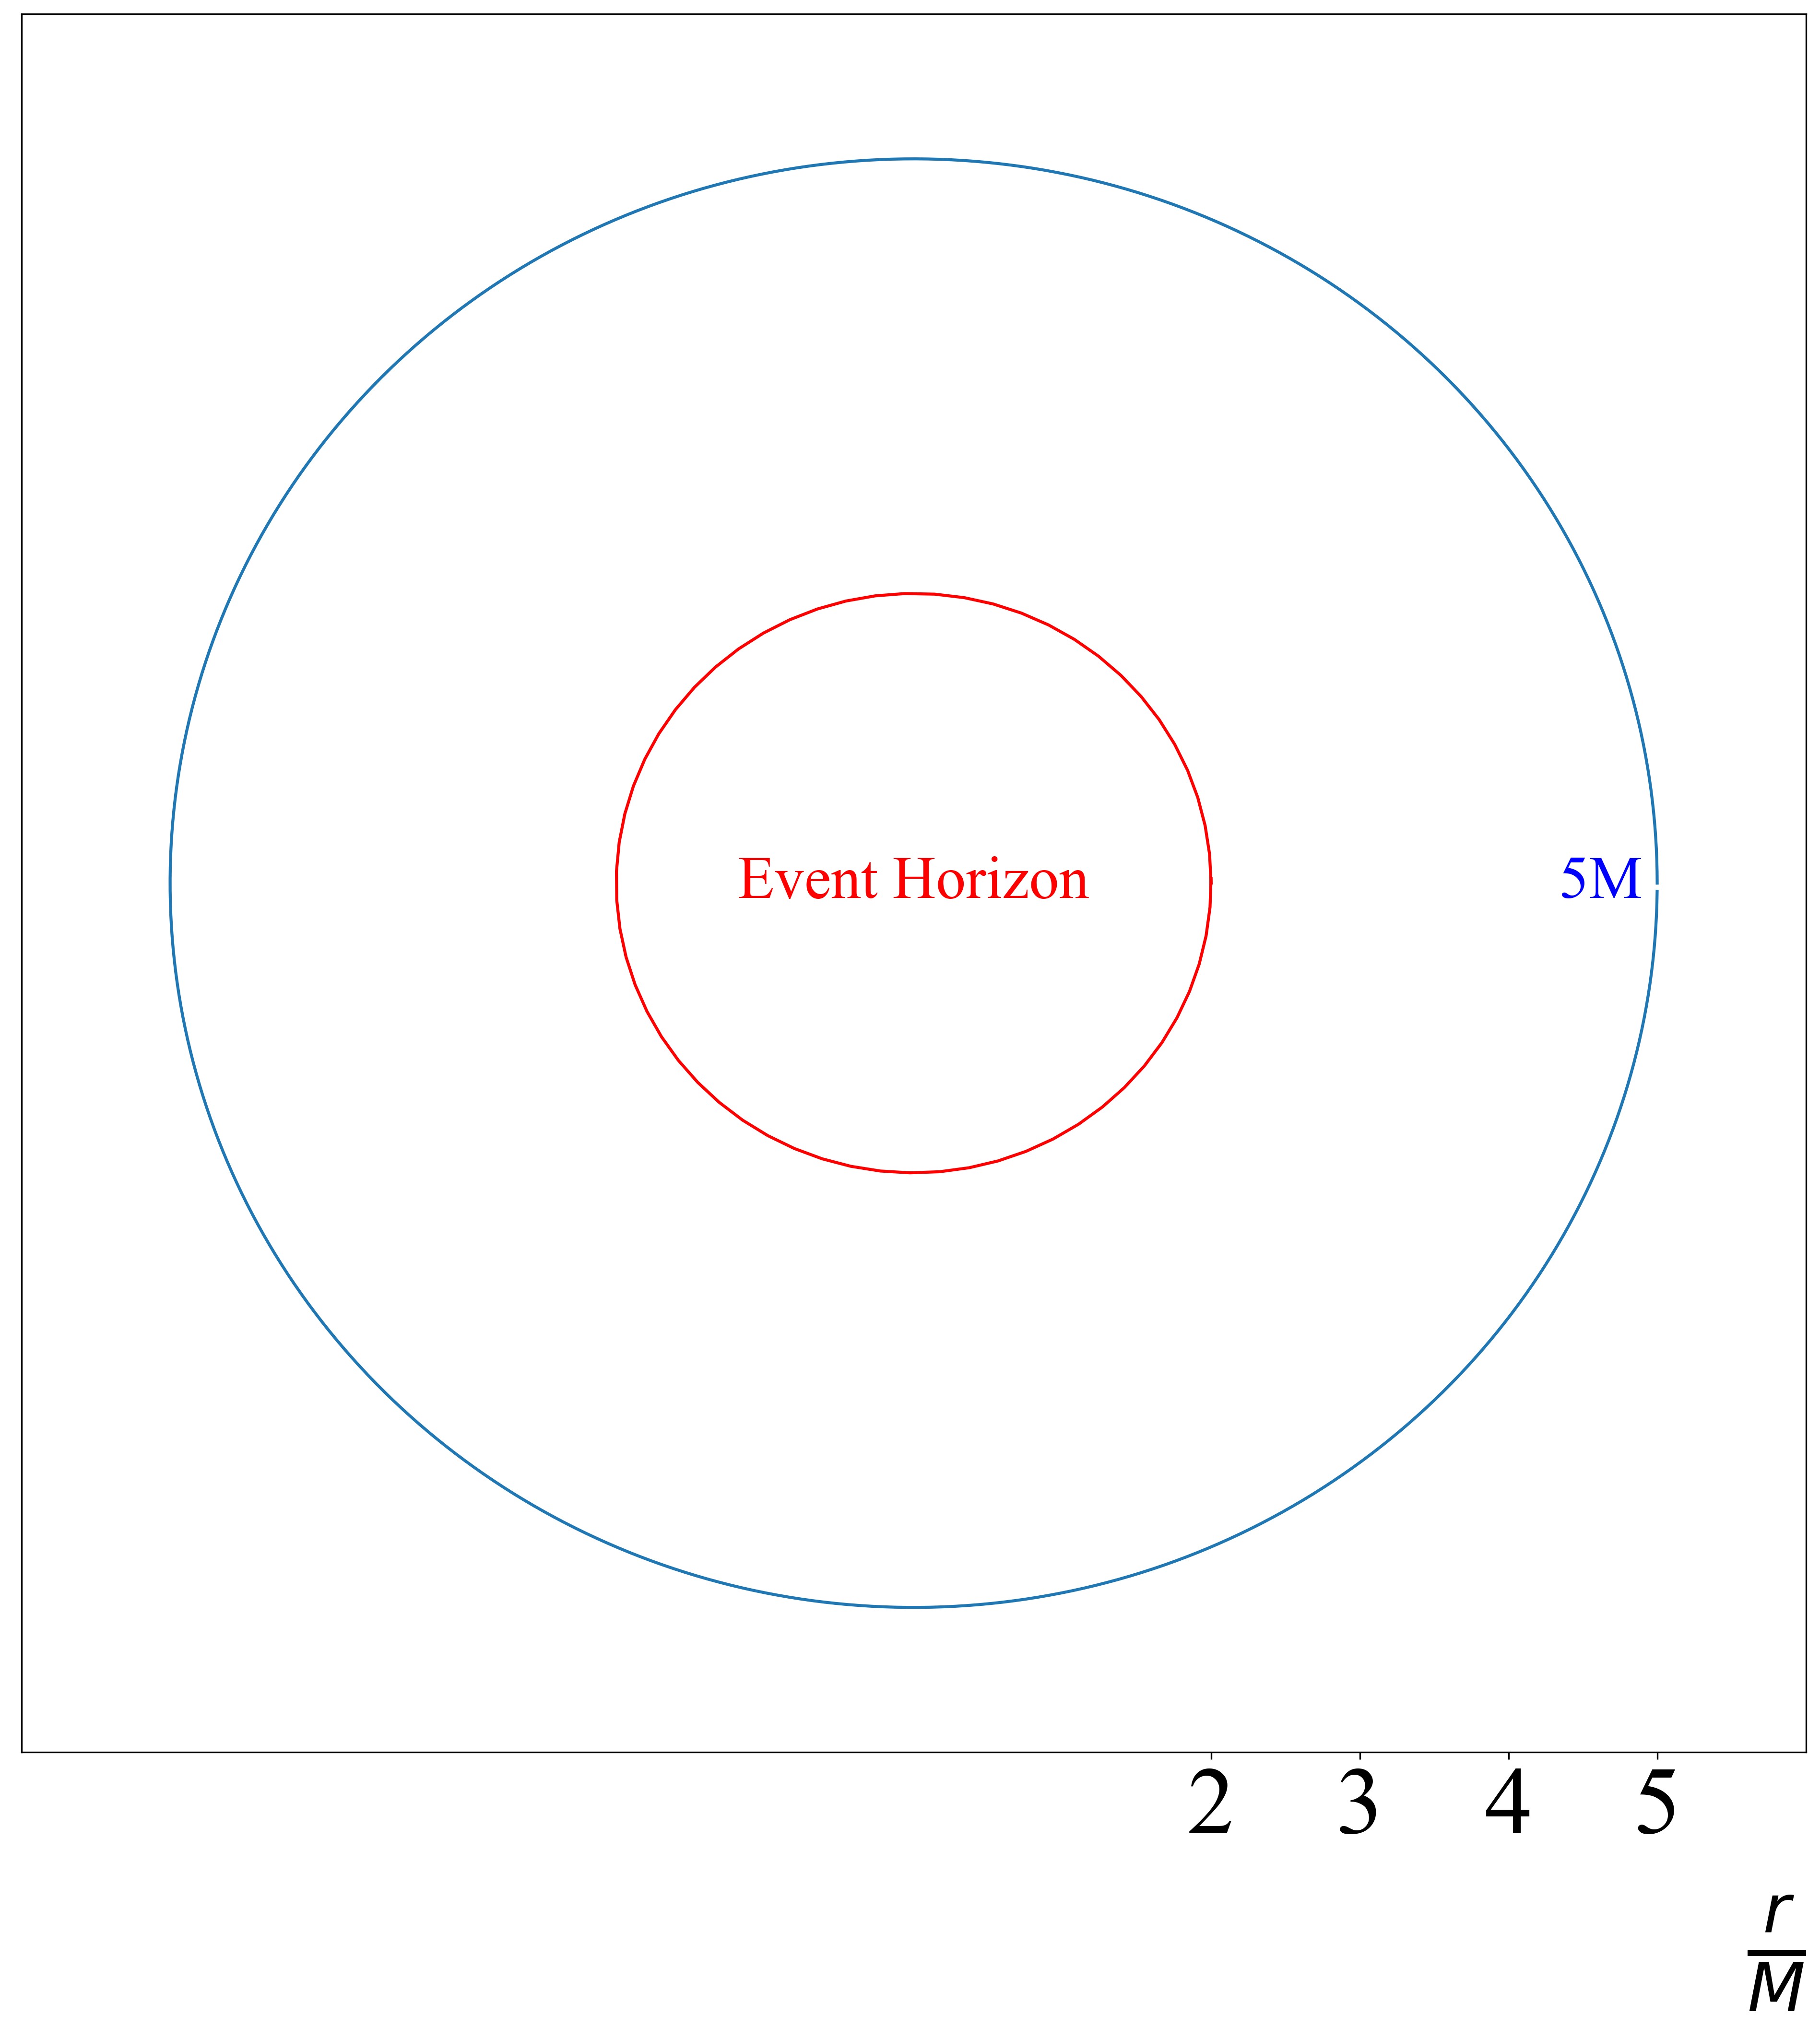

In [ ]:
diagram = 'circular'

fig = plt.figure(figsize=figure_size, dpi=300)
ax_orbit = fig.add_subplot()

shell_radius = 5
limits = (-(shell_radius+1), (shell_radius+1))
ticks = np.arange(limits[0], limits[1]+1)

plot_info = {
    "title" : "",
    "x_axis" : {
        "label" : r"$\frac{r}{M}$",
        "lim" : limits,
        "ticks" : np.arange(2, limits[1]),
        "tick_labels" : [f'{int(tick)}' for tick in np.arange(2, limits[1])],
        "offset" : 0,
    },
    "y_axis" : {
        "label" : "",
        "lim" : limits,
        "ticks" : [ ],
        "tick_labels" : [ ],
        "offset" : 0,
    },
    "font" : {
        "general" : general_plot_font,
        "axes" : axes_plot_font,
        "math" : math_plot_font,
    },
}

dtau = 0.1
phi_orbit = np.arange(0, 2*np.pi, get_satellite_dphi(shell_radius, angular_momentum_per_mass=4, dtau=dtau))

satellite_x = shell_radius * np.cos(phi_orbit)
satellite_y = shell_radius * np.sin(phi_orbit)

ax_orbit = create_orbital_figure(ax_orbit, satellite_x, satellite_y, plot_info,)

# Mark Event Horizon
horizon_phi = np.arange(0,2*np.pi+dtau,dtau)

ax_orbit.plot(
    2 * np.cos(horizon_phi),
    2* np.sin(horizon_phi),
    color="red",
    linestyle="solid"
)
ax_orbit.text(
    0*np.cos(np.pi/4),
    0*np.sin(np.pi/4), 
    "Event Horizon", 
    color="red", 
    fontproperties=plot_info['font']['general'],  
    horizontalalignment='center', 
    verticalalignment='center'
)

# Annotate Orbit
ax_orbit.text(
    (shell_radius-dtau)*np.cos(np.pi/4*0),
    (shell_radius-dtau)*np.sin(np.pi/4*0), 
    f"{shell_radius}M", 
    color="blue", 
    fontproperties=plot_info['font']['general'],  
    horizontalalignment='right', 
    verticalalignment='center'
)

plt.savefig(f'oribtal_diagram_{diagram}_{shell_radius}M.jpg',bbox_inches='tight')

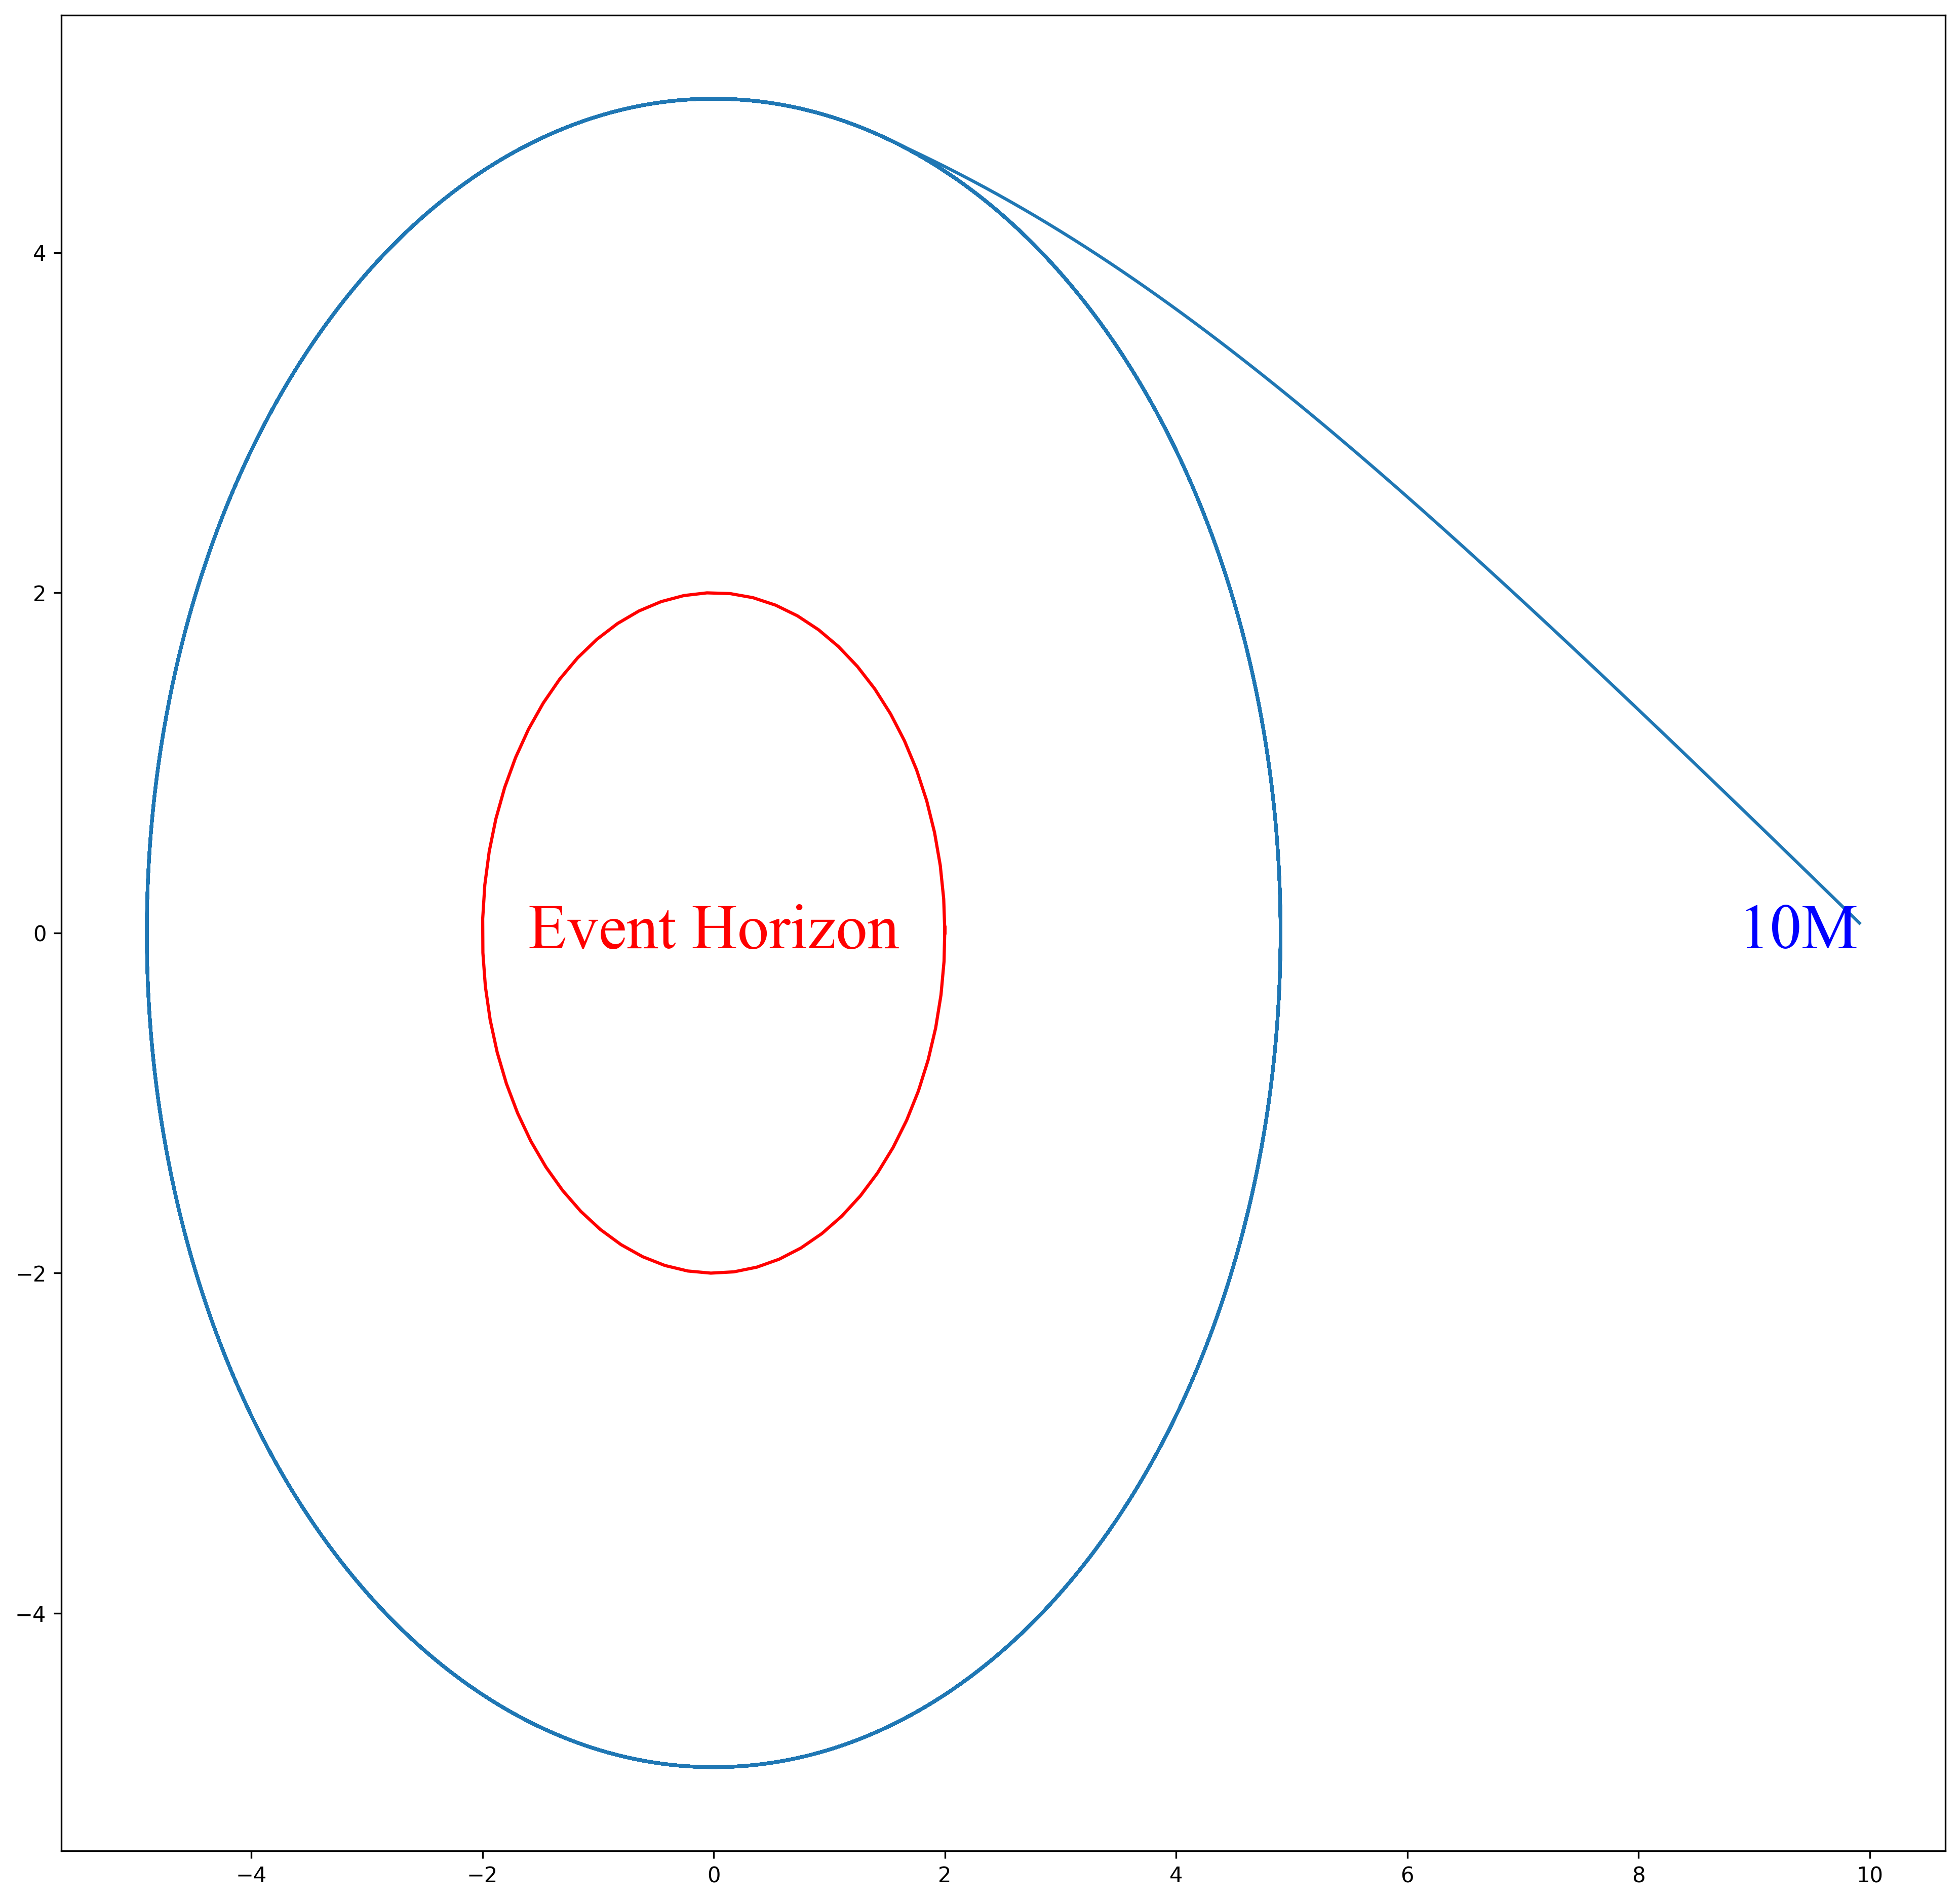

In [ ]:
diagram = 'eliptical'

fig = plt.figure(figsize=figure_size, dpi=300)
ax_orbit = fig.add_subplot()

shell_radius = 10

limits = (-(shell_radius+1), (shell_radius+1))
ticks = np.arange(limits[0], limits[1]+1)

# plot_info = {
#     "title" : "",
#     "x_axis" : {
#         "label" : r"$\frac{r}{M}$",
#         "lim" : limits,
#         "ticks" : np.arange(2, limits[1]),
#         "tick_labels" : [f'{int(tick)}' for tick in np.arange(2, limits[1])],
#         "offset" : 0,
#     },
#     "y_axis" : {
#         "label" : "",
#         "lim" : limits,
#         "ticks" : [ ],
#         "tick_labels" : [ ],
#         "offset" : 0,
#     },
#     "font" : {
#         "general" : general_plot_font,
#         "axes" : axes_plot_font,
#         "math" : math_plot_font,
#     },
# }

dtau = 0.1
elapsed_tau = np.arange(0, int(1000/dtau))

r_orbit = np.zeros(np.shape(elapsed_tau))
p_orbit = np.zeros(np.shape(elapsed_tau))

L_per_mass = 5.775
E_per_mass = 1.033

for r_index in np.arange(0, np.shape(elapsed_tau)[0]):
    _previous_r = shell_radius if r_index == 0 else r_orbit[r_index-1]
    dr = get_satellite_dr(r_coordinate=_previous_r, energy_per_mass=E_per_mass, angular_momentum_per_mass=L_per_mass, dtau=dtau)
    r_orbit[r_index] = _previous_r - dr

    _previous_p = 0 if r_index == 0 else p_orbit[r_index-1]
    dphi = get_satellite_dphi(r_orbit[r_index], angular_momentum_per_mass=L_per_mass, dtau=dtau)
    p_orbit[r_index] = _previous_p + dphi

satellite_x = np.multiply(r_orbit, np.cos(p_orbit))
satellite_y = np.multiply(r_orbit, np.sin(p_orbit))

ax_orbit = create_orbital_figure_2(ax_orbit, satellite_x, satellite_y, plot_info,)

# Mark Event Horizon
horizon_phi = np.arange(0,2*np.pi+dtau,dtau)

ax_orbit.plot(
    2 * np.cos(horizon_phi),
    2* np.sin(horizon_phi),
    color="red",
    linestyle="solid"
)
ax_orbit.text(
    0*np.cos(np.pi/4),
    0*np.sin(np.pi/4), 
    "Event Horizon", 
    color="red", 
    fontproperties=plot_info['font']['general'],  
    horizontalalignment='center', 
    verticalalignment='center'
)

# Annotate Orbit
ax_orbit.text(
    (shell_radius-dtau)*np.cos(np.pi/4*0),
    (shell_radius-dtau)*np.sin(np.pi/4*0), 
    f"{shell_radius}M", 
    color="blue", 
    fontproperties=plot_info['font']['general'],  
    horizontalalignment='right', 
    verticalalignment='center'
)

plt.savefig(f'oribtal_diagram_{diagram}M.jpg',bbox_inches='tight')

In [ ]:
dtau = 0.1
elapsed_tau = np.arange(0, int(10/dtau))

r_orbit = np.zeros(np.shape(elapsed_tau))
p_orbit = np.zeros(np.shape(elapsed_tau))
M=1
shell_radius = 10

L_per_mass = 5.775
E_per_mass = 1.033

for r_index in np.arange(0, np.shape(elapsed_tau)[0]):
    _previous_r = shell_radius if r_index == 0 else r_orbit[r_index-1]
    r_coord = np.abs(_previous_r)
    _angular_component = np.multiply(get_curvature_factor(r_coordinate=r_coord), np.power(np.true_divide(L_per_mass, r_coord), 2))
    difference_of_energy_and_angular = np.subtract(np.power(E_per_mass, 2), _angular_component)
    direction = 1 if difference_of_energy_and_angular > 0 else -1
    if direction == -1:
        print(r_coord)
    dr = np.multiply(np.sqrt(np.absolute(difference_of_energy_and_angular)), dtau * direction)

    r_orbit[r_index] = _previous_r - dr

print(r_orbit)

4.9039611173213675
4.9032915249833575
4.903273381510485
4.90327338155002
4.903273381550019
4.903273381550019
4.903273381550019
[9.91231922 9.82492201 9.73781546 9.65100686 9.56450373 9.4783138
 9.39244506 9.30690571 9.22170422 9.13684928 9.05234989 8.96821529
 8.884455   8.80107883 8.7180969  8.63551961 8.55335768 8.47162218
 8.39032446 8.30947626 8.22908963 8.149177   8.06975116 7.99082528
 7.91241292 7.83452804 7.75718497 7.68039851 7.60418383 7.52855657
 7.45353279 7.37912899 7.30536216 7.23224971 7.15980955 7.08806005
 7.01702007 6.94670895 6.87714652 6.8083531  6.7403495  6.67315705
 6.60679753 6.54129325 6.47666698 6.41294198 6.350142   6.28829124
 6.22741434 6.16753642 6.10868298 6.05087997 5.99415371 5.93853086
 5.88403847 5.83070385 5.77855463 5.72761867 5.67792404 5.62949898
 5.58237189 5.53657122 5.4921255  5.44906324 5.4074129  5.36720286
 5.32846134 5.29121636 5.25549573 5.22132696 5.18873724 5.15775341
 5.12840196 5.10070896 5.07470016 5.05040093 5.02783644 5.00703168
 4.